In [1]:
import numpy as np

### 擲50 個骰子  擲1000次  顯示機率分布

In [2]:
num=50
cal=np.zeros(num+1)
for i in range(1000):
    rand=np.random.randint(0,2,size=num)
    s=np.sum(rand)
    cal[s]+=1
cal=cal/np.sum(cal)
cal

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.012,
       0.017, 0.023, 0.045, 0.046, 0.095, 0.106, 0.11 , 0.078, 0.121,
       0.087, 0.075, 0.065, 0.04 , 0.031, 0.02 , 0.008, 0.013, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats as ss

In [5]:
hh = ss.binom(num , 0.5)
alist=[]
for k in range(0, num ):  
    alist.append(hh.pmf(k))


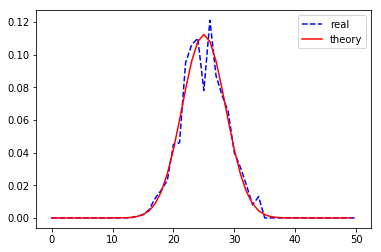

In [6]:
l1 = plt.plot(cal,'b--')
l2 = plt.plot(np.array(alist),'r')
plt.legend(['real','theory'])
plt.show()

In [7]:
alist[25]

0.11227517265921609

## poisson  distribution

In [8]:
size=5000
temp=0
mu=30
p_value=ss.poisson.rvs(mu,size=size)
judge=np.full(size,True)
counter=[]
pcounter=[]
for i in range(2*mu):
    rand=-np.log(np.random.rand(size))#1
    temp=temp+rand
    judge1=np.logical_and(judge,temp>mu)#2
    counter.append((judge1.sum()))
    judge1=np.logical_not(judge1)
    judge=np.logical_and(judge,judge1)
    pcounter.append((p_value==i).sum())
    
theory=[]
for i in range(2*mu):
    theory.append(ss.poisson.pmf(i,mu))
    

pcounter and counter,兩組隨機變數，有相同的  events/time 
pcounter 是scipy.stats.poisson 產生的隨機變數
counter 是由 rand()產生0~1的float(表示每次事件發生的時間間隔)，#1將其通過ln()使其代表的每個事件獨立,#2在統計20單位時間內事件發生次數，希望結果呈poisson distribution

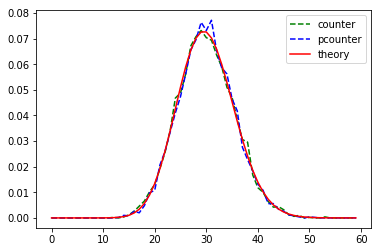

In [9]:
counter=counter/np.sum(counter)
pcounter=pcounter/np.sum(pcounter)
l5=plt.plot(counter,"g--")
l3 = plt.plot(pcounter,'b--')
l4 = plt.plot(theory,'r')
plt.legend(["counter",'pcounter','theory'])
plt.show()

In [10]:
test=np.random.rand(100)
np.sum(-np.log(test))/100

1.0424149997784702

#### 在剛才possion distribution 的實驗中遇到了一個問題便是如何生成機率密度函數為exp(-x)的隨機變數

### 如何使用 np.rand () 產生各種機率分佈(符合給定機率密度函數)

#### 定理:fy(Y)=fx(h(y))|h'(y)|  when y=g(x), h(g(x))=x   
已知fx(x)=rand()=1  when x=0~1  #h(y)值域是0~1 ----1

==>fy(y)=1* h'(y)     from ---1 #積分fy(y)必須是0~1 ---2

eg 假設我們要產生  fy(y) = exp(-y) y>0    滿足 ---2

只需積分fy(y) 得到 Fy(y) =h(y)  找反函數 得到g(x)

就可以透過 g(x) 把x:np.rand() 轉成 我們想要的 exp(-x) x>0






In [11]:
#內插函數
def Interpolation(beforex,beforey,v,afterx,aftery):
    sep=afterx-beforex
    return (v-beforex)/sep*aftery+(afterx-v)/sep*beforey
#找出一函數:yintergal 的反函數  sep:xn - xn-1 
def f_inverse(yintergal,sep):
    ycurser=0
    xcurser=0
    yvalue=[]
    while(True):
        #print(xcurser)
        if(yintergal[xcurser]>ycurser):
           # print(ycurser)
            yvalue.append(Interpolation(yintergal[xcurser-1],xcurser*sep,ycurser,yintergal[xcurser],xcurser*sep))
            ycurser+=sep
        elif(yintergal[xcurser]<=ycurser):
            xcurser+=1
            if(xcurser>=size):
                break
    return np.array(yvalue)
#將一值P通過一函數  (函數是一array:yvalue)
def transferP (p=np.array([]),yvalue=np.array([])):
    if(isinstance(p,int)):
        p=p*(yvalue.size-1)
        return Interpolation(int(p),yvalue[int(p)],p,int(p)+1,yvalue[int(p)+1])
    elif(isinstance(p,np.ndarray)):
        p=p*(yvalue.size-1)
        return Interpolation(p.astype(int),yvalue[p.astype(int)],
                             p,p.astype(int)+1,yvalue[p.astype(int)+1])
#數不同x值的發生次數
def counter(array,sep=1,up_bound=100):
    count=[]
    array=(array/sep).astype(int)
    for i in range(int(up_bound/sep)-1):
        count.append((array.astype(int)==i).sum())
    return np.array(count)

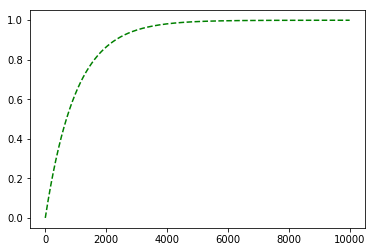

In [12]:
#Start
size=10000
x=np.array(range(size))
sep=0.001
x=x*sep
yp=np.exp(-x)  # 假設我們需要 exp(-x)的分布
yintergal=np.zeros(size)
for i in range(1,size):
    yintergal[i]=yintergal[i-1]+sep*yp[i]
plt.plot(yintergal,"g--")  #exp(-x) 積分後

1000

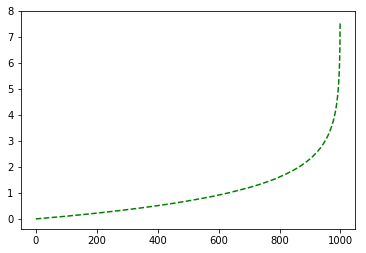

In [13]:
yvalue=f_inverse(yintergal,sep)#求出需要的機率密度函數F(x)的反函數
plt.plot((yvalue),"g--")
yvalue.size

In [14]:
test=(transferP(np.random.rand(10000),yvalue))  
#將原本的隨機變數 rand()轉變成 機率密度函數為exp(-x)的隨機變數

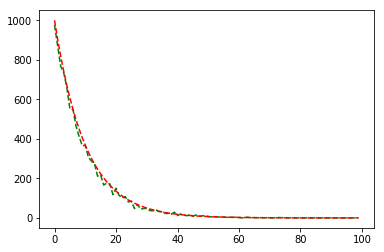

In [15]:
p1=plt.plot(counter(test,0.1,10),"g--")#實驗
ex=np.array(range(100))/10
p2=plt.plot(np.exp(-ex)*1000,"r--")#對照
plt.show()  #分布的確是exp(-x)

### 打包以上方法  

In [16]:
import random
import numpy as np
class create_rand_num:
    def __init__(self,p_dens,sep1):
        sep=sep1
        size=p_dens.size
        x=np.array(range(size))
        yintergal=np.zeros(size)
        for i in range(1,size):
            yintergal[i]=yintergal[i-1]+sep*p_dens[i]
        yintergal=yintergal/yintergal[-1]
        yvalue=f_inverse(yintergal,sep)
        
        self.yvalue=yvalue
        
    def Interpolation(self,beforex,beforey,v,afterx,aftery):
        sep=afterx-beforex
        return (v-beforex)/sep*aftery+(afterx-v)/sep*beforey
    
    def f_inverse(self,yintergal,sep):
        ycurser=0
        xcurser=0
        yvalue=[]
        while(True):
            #print(xcurser)
            if(yintergal[xcurser]>ycurser):
               # print(ycurser)
                yvalue.append(self.Interpolation(yintergal[xcurser-1],xcurser*sep,ycurser,yintergal[xcurser],xcurser*sep))
                ycurser+=sep
            elif(yintergal[xcurser]<=ycurser):
                xcurser+=1
                if(xcurser>=size):
                    break
        return np.array(yvalue)
    
    def transferP (self,p=np.array([])):
        yvalue=self.yvalue
        if(isinstance(p,float)):
            p=p*(yvalue.size-1)
            return Interpolation(int(p),yvalue[int(p)],p,int(p)+1,yvalue[int(p)+1])
        elif(isinstance(p,np.ndarray)):
            p=p*(yvalue.size-1)
            return Interpolation(p.astype(int),yvalue[p.astype(int)],
                                 p,p.astype(int)+1,yvalue[p.astype(int)+1])
    def rand_(self,size=1):
        if(size==1):
            return self.transferP(random.random())
        else:
            return self.transferP(np.random.rand(size))
    
    

### 操作

In [17]:
size=10000
x=np.array(range(size))
sep=0.001
x=x*sep
yp=np.abs(np.sin(x))  # 假設我們需要 abs(sin(x)) x=0~10 的分布
test=create_rand_num(yp,sep) #將機率密度array 和其sep(xn+1 -xn) 丟入
ran=test.rand_(100)  #取得random number 分布是abs(sin(x)) x=0~10的 一百個 隨機變數

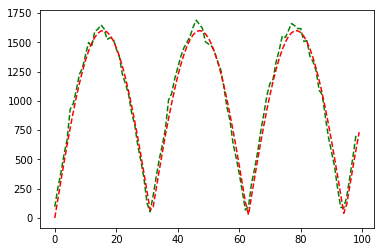

In [20]:
pl1=counter(test.rand_(100000),0.1,10)
p1=plt.plot(pl1,"g--")#實驗
ex=np.array(range(100))/10
p2=plt.plot(np.abs(np.sin(ex))*1600,"r--")#對照
plt.show()

#### 有了這個工具就可以做更多實驗了

In [29]:
#沿用剛才的abs(sin(x))  x=0~10機率密度 的隨機變數
mother=test.rand_(100000)
#來實驗隨機抽樣好了
def sampling (s,a=np.array([])):
    return a[np.random.randint(a.size-1,size=s)]
#已知E(sample.avg)=u
u=mother.sum()/mother.size
sample_=0
for i in range(100):
    sample_+=sampling(10,mother).sum()/1000
print("u:",u,"       E(sample.avg):",sample_)

u: 4.839635288560352        E(sample.avg): 4.88383585066191


In [ ]:
#又D(sample.avg)=sigma^2/n
